In [2]:
import networkx as nx
from networkx_robustness import networkx_robustness
import matplotlib.pyplot as plt
import numpy as np
import random
from statistics import mean
import pandas as pd
import powerlaw
import collections

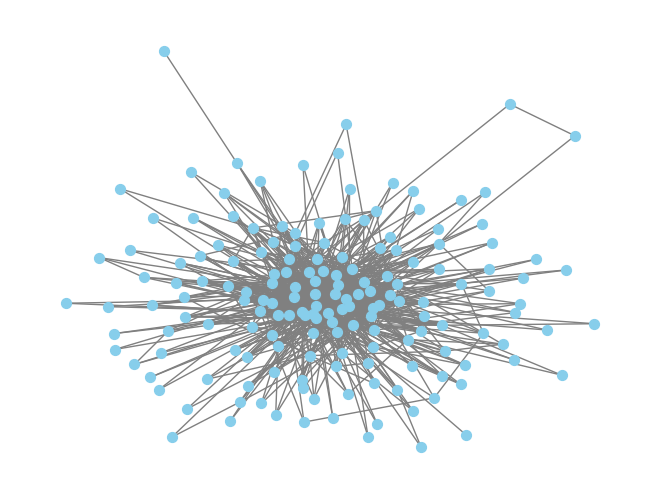

In [64]:
g = nx.DiGraph()

def create_graph():
    with open('gephitable.csv') as f:
        for row in f:
            s = row.split(',')
            g.add_edge(s[0], s[1], weight=int(s[2]))

create_graph()
RC = g.to_undirected()
RC
nx.draw(RC, with_labels=False, font_weight='bold', node_color='skyblue', font_color='black', edge_color='gray', node_size=50)
plt.show()

In [8]:
print(RC.number_of_edges())
print(RC.number_of_nodes())

981
167


In [60]:
# Min-max scaling function
def min_max_scale(x):
    min_x = min(x)
    max_x = max(x)
    scaled_x = [(value - min_x) / (max_x - min_x) for value in x]
    return scaled_x

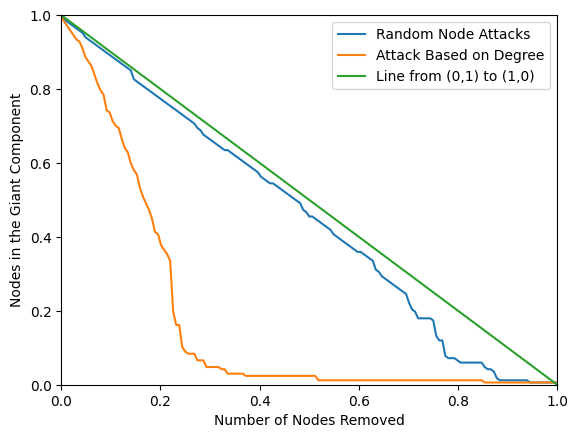

In [16]:


#random attack in 99% of nodes


initial, frac, apl = networkx_robustness.simulate_random_attack(RC, attack_fraction=0.99)
x_v=range(0,len(frac))
x_scaled=min_max_scale(x_v)
plt.plot(x_scaled,frac, label='Random Node Attacks')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Nodes in the Giant Component')
#plt.title('Network Robustness Simulation')


##Degree attack
initial2, frac2, apl2 = networkx_robustness.simulate_degree_attack(RC, attack_fraction=0.99, weight=None)
x_v2=range(0,len(frac2))
x_scaled2=min_max_scale(x_v2)

plt.plot(x_scaled2,frac2, label='Attack Based on Degree')
#plt.plot(apl, label='Average Path Length')

x_line = [0, 1]
y_line = [1, 0]

plt.plot(x_line, y_line, label='Line from (0,1) to (1,0)')


plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


In [17]:
critical_threshold = networkx_robustness.critical_threshold(RC)
print(critical_threshold)
molloy_reed = networkx_robustness.molloy_reed(g)
print(molloy_reed)

None
44.67576243980738


In [ ]:
## as undirected
RC.number_of_nodes()
RC.number_of_edges()
g.number_of_edges()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


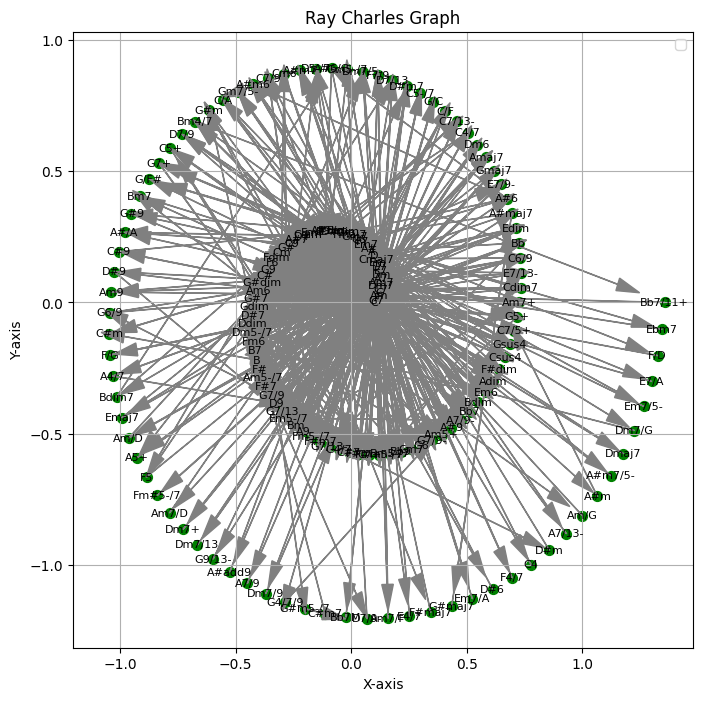

In [67]:
def normal_spiral_points(num_points, a=0.1, b=0.1):
    # Generate points for a normal spiral
    theta = np.linspace(0, 4 * np.pi, num_points)
    x = (a + b * theta) * np.cos(theta)
    y = (a + b * theta) * np.sin(theta)
    
    return x, y

# Number of nodes and points to generate
num_nodes = 167
num_points = 167

# Generate normal spiral points
x, y = normal_spiral_points(num_points)

# Sort nodes by degree (higher degree in the center)
sorted_nodes = sorted(g.nodes(), key=lambda x: g.degree(x), reverse=True)

# Plot the normal spiral with nodes and edges
plt.figure(figsize=(8, 8))
#plt.plot(x, y, label='Normal Spiral', color='blue')
#plt.scatter(0, 0, color='red', label='Center')

# Plot nodes on the spiral in order of degree
for i, node in enumerate(sorted_nodes):
    plt.scatter(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], color='green', s=50)
    plt.text(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], str(node), color='black', fontsize=8, ha='center', va='center')

# Plot edges
for edge in g.edges():
    pos1 = sorted_nodes.index(edge[0])
    pos2 = sorted_nodes.index(edge[1])
    x1, y1 = x[pos1 * (num_points // num_nodes)], y[pos1 * (num_points // num_nodes)]
    x2, y2 = x[pos2 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]
    
    dx = x2 - x1
    dy = y2 - y1
    scale_factor = 0.9  # You can adjust this factor to control the arrow length
    dx *= scale_factor
    dy *= scale_factor

    plt.arrow(x1, y1, dx, dy,color='gray', linestyle='-', linewidth=1, head_width=0.05, head_length=0.1) #[x[pos1 * (num_points // num_nodes)], x[pos2 * (num_points // num_nodes)]], [y[pos1 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]],

plt.title('Ray Charles Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
nx.density(g1)
node_degrees2 = list(dict(g1.degree()).values())
# Calculate and print the mean degree
mean_degree2 = mean(node_degrees2)
mean_degree2
#nx.average_clustering(G)

StatisticsError: mean requires at least one data point

In [48]:
g1.degree()

DiDegreeView({})

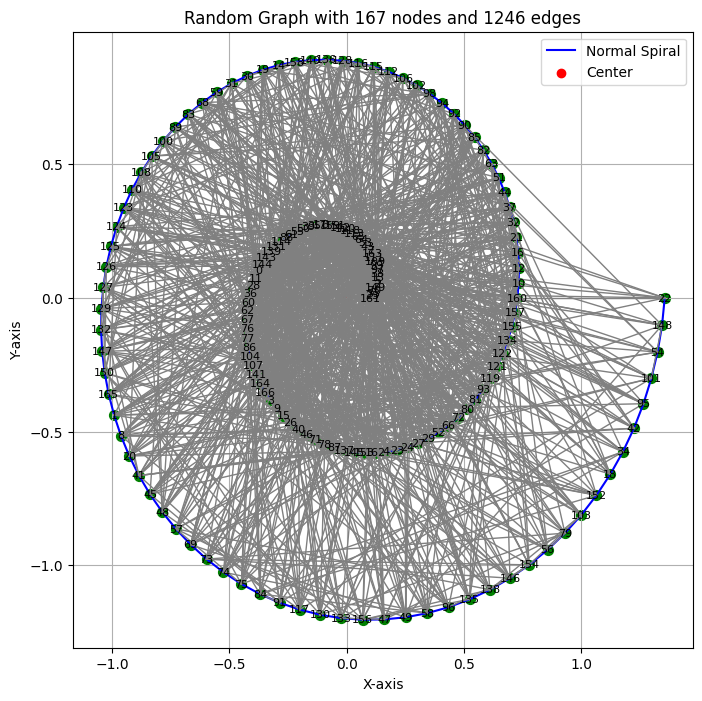

In [13]:
# Number of nodes and points to generate
num_nodes = 167
num_points = 167
edges=1246
# Generate normal spiral points
x, y = normal_spiral_points(num_points)

# Create a graph
G=nx.gnm_random_graph(num_nodes, edges)

# Sort nodes by degree (higher degree in the center)
sorted_nodes = sorted(G.nodes(), key=lambda x: G.degree(x), reverse=True)

# Plot the normal spiral with nodes and edges
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Normal Spiral', color='blue')
plt.scatter(0, 0, color='red', label='Center')

# Plot nodes on the spiral in order of degree
for i, node in enumerate(sorted_nodes):
    plt.scatter(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], color='green', s=50)
    plt.text(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], str(node), color='black', fontsize=8, ha='center', va='center')

# Plot edges
for edge in G.edges():
    pos1 = sorted_nodes.index(edge[0])
    pos2 = sorted_nodes.index(edge[1])
    plt.plot([x[pos1 * (num_points // num_nodes)], x[pos2 * (num_points // num_nodes)]],
             [y[pos1 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]],
             color='gray', linestyle='-', linewidth=1)

plt.title('Random Graph with 167 nodes and 1246 edges')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
nx.density(G)
node_degrees = list(dict(G.degree()).values())
# Calculate and print the mean degree
mean_degree = mean(node_degrees)
mean_degree
#nx.average_clustering(G)

14.922155688622755

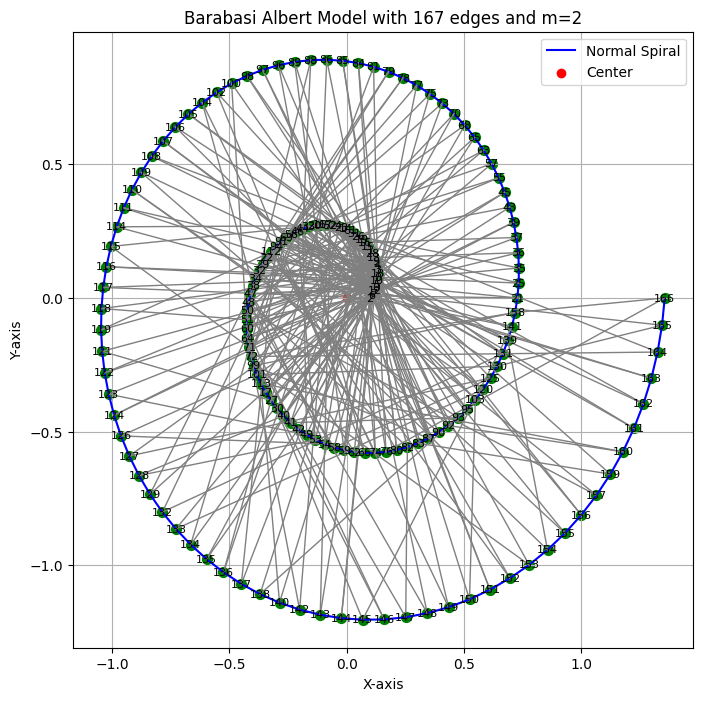

In [28]:
# Number of nodes and points to generate
num_nodes = 167
num_points = 167
# Generate normal spiral points
x, y = normal_spiral_points(num_points)

# Create a graph
G2=nx.barabasi_albert_graph(num_nodes, 2)

# Sort nodes by degree (higher degree in the center)
sorted_nodes = sorted(G2.nodes(), key=lambda x: G2.degree(x), reverse=True)

# Plot the normal spiral with nodes and edges
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Normal Spiral', color='blue')
plt.scatter(0, 0, color='red', label='Center')

# Plot nodes on the spiral in order of degree
for i, node in enumerate(sorted_nodes):
    plt.scatter(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], color='green', s=50)
    plt.text(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], str(node), color='black', fontsize=8, ha='center', va='center')

# Plot edges
for edge in G2.edges():
    pos1 = sorted_nodes.index(edge[0])
    pos2 = sorted_nodes.index(edge[1])
    plt.plot([x[pos1 * (num_points // num_nodes)], x[pos2 * (num_points // num_nodes)]],
             [y[pos1 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]],
             color='gray', linestyle='-', linewidth=1)

plt.title('Barabasi Albert Model with 167 edges and m=2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
G2.number_of_edges()
nx.density(G2)

node_degrees = list(dict(RC.degree()).values())
# Calculate and print the mean degree
mean_degree = mean(node_degrees)
mean_degree
#nx.average_clustering(G2)

11.748502994011975

Original Robustness (size of largest CC): 167
Robustness after Link Attack (size of largest CC): 154


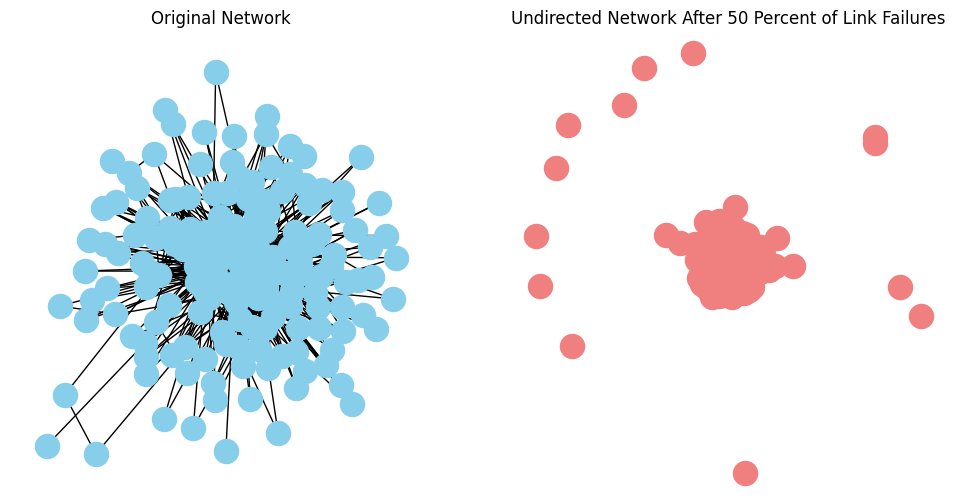

In [83]:
# Create a random graph (replace this with your own network data)

# Measure the robustness of the original network
original_size_largest_cc = len(max(nx.connected_components(RC), key=len))

print("Original Robustness (size of largest CC):", original_size_largest_cc)

# Perform a link attack by removing a fraction of edges
fraction_to_remove = 0.5
edges_to_remove = int(fraction_to_remove * RC.number_of_edges())
random_edges = list(RC.edges())
removed_edges = random.sample(random_edges,edges_to_remove)

G_attack3 = RC.copy()
G_attack3.remove_edges_from(removed_edges)

# Measure the robustness after the link attack
attack_size_largest_cc = len(max(nx.connected_components(G_attack3), key=len))

print("Robustness after Link Attack (size of largest CC):", attack_size_largest_cc)

# Visualize the original and attacked networks
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw(RC, with_labels=False, font_weight='bold', node_color='skyblue')
plt.title('Original Network')

plt.subplot(1, 2, 2)
nx.draw(G_attack3, with_labels=False, font_weight='bold', node_color='lightcoral')
plt.title('Undirected Network After 50 Percent of Link Failures')

plt.show()


Original Robustness (size of largest SCC): 167
Robustness after Link Attack (size of largest SCC): 121


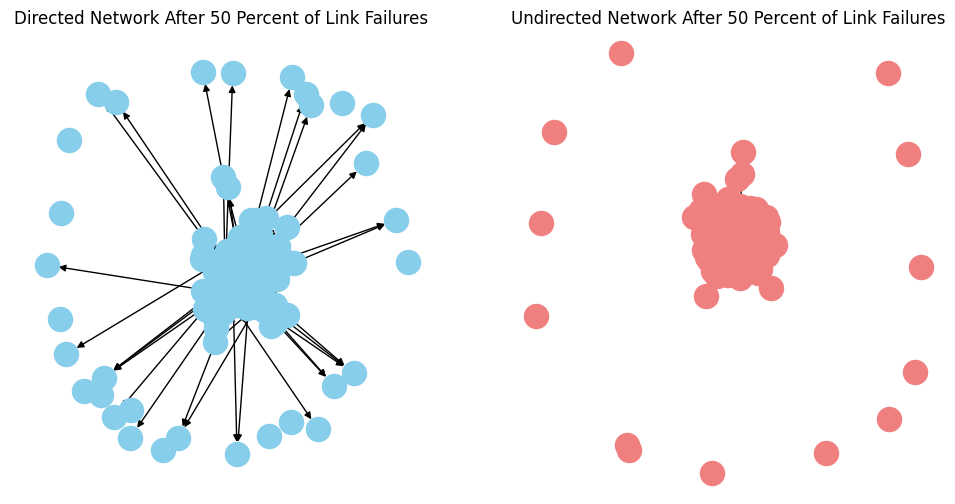

In [87]:
# Create a random graph (replace this with your own network data)

# Measure the robustness of the original network
largest_scc = max(nx.strongly_connected_components(g), key=len)
original_size_largest_scc  = len(largest_scc)

print("Original Robustness (size of largest SCC):", original_size_largest_scc)

# Perform a link attack by removing a fraction of edges
fraction_to_remove = 0.5
edges_to_remove = int(fraction_to_remove * g.number_of_edges())
random_edges = list(g.edges())
removed_edges = random.sample(random_edges,edges_to_remove)

G_attack = g.copy()
G_attack.remove_edges_from(removed_edges)

# Measure the robustness after the link attack
after_attack=max(nx.strongly_connected_components(G_attack), key=len)
attack_size_largest_scc = len(after_attack)

print("Robustness after Link Attack (size of largest SCC):", attack_size_largest_scc)

# Visualize the original and attacked networks
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
nx.draw(G_attack3, with_labels=False, font_weight='bold', node_color='lightcoral')
plt.title('Undirected Network After 50 Percent of Link Failures')

plt.subplot(1, 2, 1)
nx.draw(G_attack, with_labels=False, font_weight='bold', node_color='skyblue')
plt.title('Directed Network After 50 Percent of Link Failures')

plt.show()


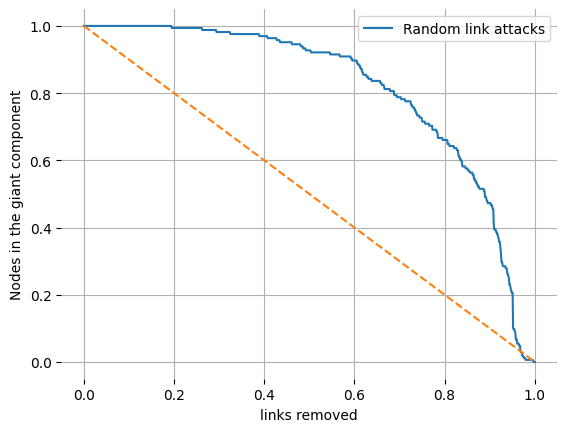

In [56]:
def link_robustness(G):
    G_attack = G.copy()
    y=[]
    x=[]
    #m_r=[]
    #c_t=[]
    connected_comp_length=len(max(nx.connected_components(G_attack), key=len)) #length of the connected component
    y.append(connected_comp_length) #start
    x.append(0)  #start
    for i in range(1,G.number_of_edges()-1):
        graph_edges = list(G_attack.edges())
        removed_edges = random.sample(graph_edges,1)
        #critical_threshold = networkx_robustness.critical_threshold(G_attack)
        #molloy_reed = networkx_robustness.molloy_reed(G_attack)
        G_attack.remove_edges_from(removed_edges)
        connected_comp_length= len(max(nx.connected_components(G_attack), key=len))
        x.append(i)
        y.append(connected_comp_length)
        #m_r.append(molloy_reed)
        #c_t.append(critical_threshold)
    return x , y#, m_r, c_t 

x_values,y_values=link_robustness(RC) #,m_r,c_t
x_s=min_max_scale(x_values)
y_s=min_max_scale(y_values)

# Plotting the line
plt.plot(x_s, y_s,label='Random link attacks')
plt.plot(x_line, y_line,linestyle='--')

# Adding labels to the axes
plt.xlabel('links removed')
plt.ylabel('Nodes in the giant component')
#plt.xlim(0,1)
#plt.ylim(0,1)



# Adding a title to the plot
#plt.title('Robustness for random links attacks')
#
plt.box(False)
plt.grid(True)
plt.axis('on')
plt.legend()
# Display the plot
plt.show()

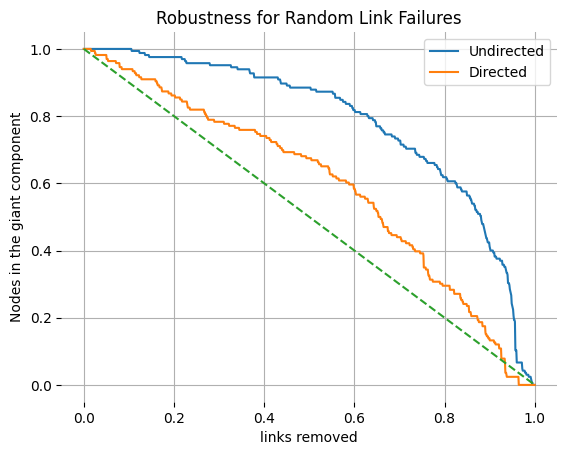

In [68]:
# Find the largest strongly connected component


def link_robustness_di(G):
    G_attack = G.copy()
    y=[]
    x=[]
    #m_r=[]
    #c_t=[]
    largest_scc = max(nx.strongly_connected_components(G_attack), key=len)
    connected_comp_length_scc = len(largest_scc)
    y.append(connected_comp_length_scc) #start
    x.append(0)  #start
    for i in range(1,G.number_of_edges()-1):
        graph_edges = list(G_attack.edges())
        removed_edges = random.sample(graph_edges,1)
        #critical_threshold = networkx_robustness.critical_threshold(G_attack)
        #molloy_reed = networkx_robustness.molloy_reed(G_attack)
        G_attack.remove_edges_from(removed_edges)
        largest_scc = max(nx.strongly_connected_components(G_attack), key=len)
        connected_comp_length_scc = len(largest_scc)
        x.append(i)
        y.append(connected_comp_length_scc)
        #m_r.append(molloy_reed)
        #c_t.append(critical_threshold)
    return x , y#, m_r, c_t 

x_values,y_values=link_robustness(RC) #,m_r,c_t
x_s=min_max_scale(x_values)
y_s=min_max_scale(y_values)

# Plotting the line
plt.plot(x_s, y_s,label='Undirected')

x_values2,y_values2=link_robustness_di(g) #,m_r,c_t
x_s2=min_max_scale(x_values2)
y_s2=min_max_scale(y_values2)

# Plotting the line
plt.plot(x_s2, y_s2,label='Directed')
plt.plot(x_line, y_line,linestyle='--')

# Adding labels to the axes
plt.xlabel('links removed')
plt.ylabel('Nodes in the giant component')
#plt.xlim(0,1)
#plt.ylim(0,1)



# Adding a title to the plot
plt.title('Robustness for Random Link Failures')
#
plt.box(False)
plt.grid(True)
plt.axis('on')
plt.legend()
# Display the plot
plt.show()



In [38]:
for index, value in enumerate(m_r):
    if value < 2:
        position = index
        break

print(position) 

955


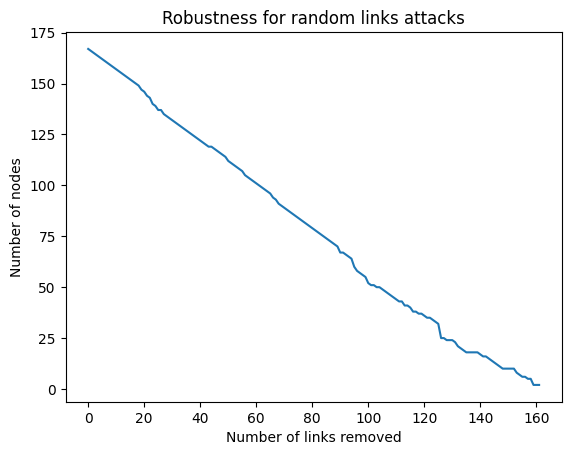

In [45]:
def node_attack(G):
    G_attack = G.copy()
    y=[]
    x=[]
    #m_r=[]
    #c_t=[]
    connected_comp_length=len(max(nx.connected_components(G_attack), key=len)) #length of the connected component
    y.append(connected_comp_length) #start
    x.append(0)  #start
    for i in range(1,G.number_of_nodes()-5):
        graph_nodes = list(G_attack.nodes())
        removed_nodes = random.sample(graph_nodes,1)
        removed_nodes = removed_nodes[0]
        #critical_threshold = networkx_robustness.critical_threshold(G_attack)
        #molloy_reed = networkx_robustness.molloy_reed(G_attack)
        G_attack.remove_node(removed_nodes)
        connected_comp_length= len(max(nx.connected_components(G_attack), key=len))
        x.append(i)
        y.append(connected_comp_length)
        #m_r.append(molloy_reed)
        #c_t.append(critical_threshold)
    return x , y#, m_r#, c_t 

x_values,y_values=node_attack(RC) #,m_r2
# Plotting the line
plt.plot(x_values, y_values)

# Adding labels to the axes
plt.xlabel('Number of links removed')
plt.ylabel('Number of nodes')

# Adding a title to the plot
plt.title('Robustness for random links attacks')

# Display the plot
plt.show()

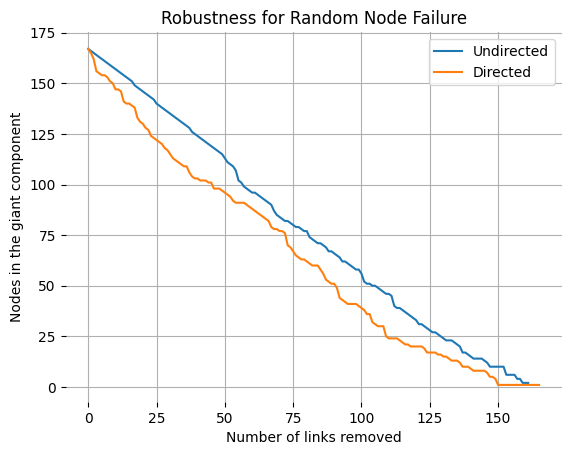

In [72]:
def node_attack_di(G):
    G_attack = G.copy()
    y=[]
    x=[]
    #m_r=[]
    #c_t=[]
    largest_scc = max(nx.strongly_connected_components(G_attack), key=len)
    connected_comp_length_scc = len(largest_scc)
    y.append(connected_comp_length_scc) #start
    x.append(0)  #start
    for i in range(1,G.number_of_nodes()-1):
        graph_nodes = list(G_attack.nodes())
        removed_nodes = random.sample(graph_nodes,1)
        removed_nodes = removed_nodes[0]
        #critical_threshold = networkx_robustness.critical_threshold(G_attack)
        #molloy_reed = networkx_robustness.molloy_reed(G_attack)
        G_attack.remove_node(removed_nodes)
        largest_scc = max(nx.strongly_connected_components(G_attack), key=len)
        connected_comp_length_scc = len(largest_scc)
        y.append(connected_comp_length_scc) #start
        x.append(i)
        #m_r.append(molloy_reed)
        #c_t.append(critical_threshold)
    return x , y#, m_r#, c_t 

##
x_values,y_values=node_attack(RC)
# Plotting the line
plt.plot(x_values, y_values, label='Undirected')
plt.xlabel('Number of links removed')
plt.ylabel('Nodes in the giant component')
# Adding a title to the plot
plt.title('Robustness for Random Node Failure')


x_values2,y_values2=node_attack_di(g) #,m_r2
# Plotting the line
plt.plot(x_values2, y_values2,label='Directed')

plt.box(False)
plt.grid(True)
#plt.axis('on')
plt.legend()
plt.show()

In [74]:
m_r2


[30.76350662589195,
 30.63897435897436,
 30.520661157024797,
 30.277019937040926,
 30.134249471458773,
 30.134676564156944,
 30.15727948990436,
 30.051282051282055,
 29.776200873362445,
 29.26297968397291,
 29.10665137614679,
 29.05800464037123,
 29.013969732246796,
 28.51869722557298,
 28.496977025392983,
 28.41626213592233,
 27.41516709511568,
 27.367268041237118,
 27.33893919793014,
 27.25584415584416,
 27.118954248366013,
 26.936758893280636,
 26.896688741721857,
 26.885941644562337,
 26.90026595744681,
 26.17251051893408,
 26.168776371308017,
 26.138418079096045,
 26.077903682719548,
 24.05736434108527,
 23.94392523364486,
 23.52827140549273,
 23.494327390599675,
 23.19087837837838,
 23.252542372881354,
 23.249569707401033,
 23.160211267605632,
 23.092035398230088,
 22.64705882352941,
 22.619926199261993,
 21.464143426294818,
 21.419161676646706,
 21.343434343434343,
 21.39103869653768,
 21.364754098360656,
 21.31752577319588,
 21.332644628099175,
 21.269151138716353,
 20.19101123

In [ ]:
G_attack=RC.copy()
graph_edges = list(G_attack.edges())
removed_edges = random.sample(graph_edges,1)
G_attack.remove_edges_from(removed_edges)
connected_comp_length= len(max(nx.connected_components(G_attack)))
#x.append(i)
#y.append(connected_comp_length)



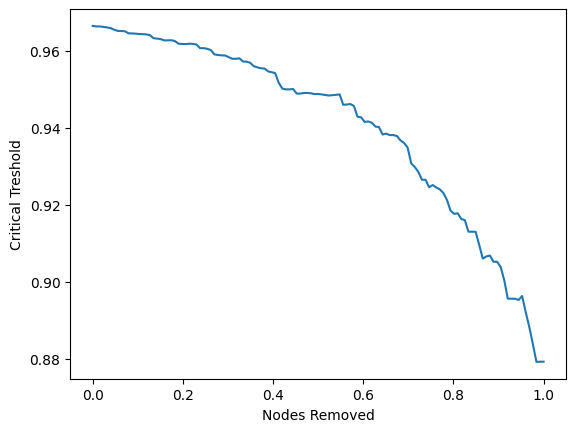

In [62]:
def mo_re(graph):
    k_squared = []
    k_deg = []
    for node, deg in graph.degree():
        k_squared.append(deg**2)
        k_deg.append(deg)
    return mean(k_squared)/mean(k_deg)

    
#RC
#mo_re(RC)

def fc(graph):
    return(1-(1/(mo_re(graph)-1)))

def threshold_node(G):
    G_attack = G.copy()
    f_c=[]
    f_c.append(fc(G_attack))
    y=[]
    y.append(0)
    #connected_comp_length=len(max(nx.connected_components(G_attack), key=len)) #length of the connected component
    #y.append(connected_comp_length) #start
    for i in range(1,G.number_of_nodes()-40):
        graph_nodes = list(G_attack.nodes())
        removed_nodes = random.sample(graph_nodes,1)
        removed_nodes = removed_nodes[0]
        G_attack.remove_node(removed_nodes)
        #connected_comp_length=len(max(nx.connected_components(G_attack), key=len)) #length of the connected component
        f_c.append(fc(G_attack))
        y.append(i)

    return f_c,y


f_c,y=threshold_node(RC)
y_s=min_max_scale(y)

# Plotting the line
plt.plot(y_s,f_c)

# Adding labels to the axes
plt.xlabel('Nodes Removed')
plt.ylabel('Critical Treshold')

# Adding a title to the plot
#plt.title('Robustness for random links attacks')

# Display the plot
plt.show()


In [88]:
fc(g)

0.9771040058801911

In [89]:
fc(RC)

0.9664018083430372

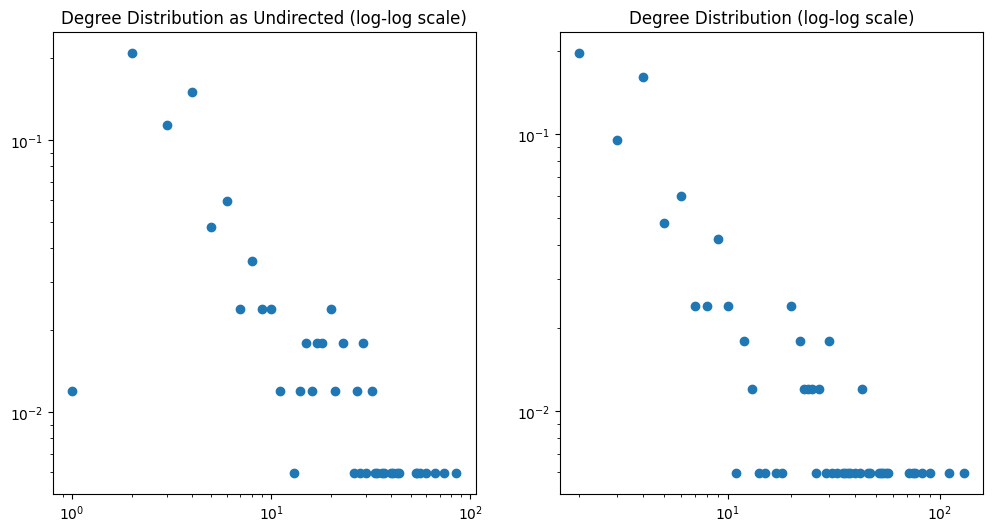

In [58]:
#degree_sequence = sorted([d for n, d in RC.degree()], reverse=True)
#degree_counts = nx.degree_histogram(RC)
#plt.loglog(range(len(degree_counts)), degree_counts)


def plot_degree_histogram(g, normalized=True, weight=None):
    
    degree_sequence = sorted([d for n, d in g.degree(weight=weight)], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    aux_x, aux_y = zip(*degreeCount.items())

    n_nodes = g.number_of_nodes()
    aux_y = list(aux_y)
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y


# Visualize the original and attacked networks
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
aux_x, aux_y=plot_degree_histogram(g)
plt.plot(aux_x, aux_y, 'o')
plt.xscale("log")
plt.yscale("log")
plt.title('Degree Distribution (log-log scale)')

plt.subplot(1, 2, 1)
aux_x2, aux_y2=plot_degree_histogram(RC)
plt.plot(aux_x2, aux_y2, 'o')
plt.xscale("log")
plt.yscale("log")
plt.title('Degree Distribution as Undirected (log-log scale)')

#plt.title('\nDistribution Of Node Linkages (log-log scale)')
#plt.xlabel('Degree\n(log scale)')
#plt.ylabel('Number of Nodes\n(log scale)')

#plt.plot(aux_x, aux_y, 'o')

plt.show()

In [63]:
mo_re(RC)

30.76350662589195

In [65]:
mo_re(g)

44.67576243980738